<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass4/bdm/%20Truth%20Archive/Assignment_4_Truth_Archive_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introucuction:

The analysis and prediction of taxi trip data in New York City serve as a compelling domain for data science projects. In this project, our focus lies on feature engineering, a crucial step in the data preprocessing pipeline, where we transform raw data into a format that enhances the performance of machine learning models. The dataset at hand encapsulates information about taxi rides in New York City during the year 2015, providing a rich source for feature extraction and engineering.

The dataset consists of various attributes such as vendor ID, pickup and dropoff timestamps, passenger count, trip distance, geographical coordinates of pickup and dropoff locations, fare details, payment type, and additional charges. The objective of our project is to craft new features that encapsulate meaningful information, thereby improving the predictive power of models aiming to understand and forecast taxi trip patterns.

#Downlading the dataset

To set up the project environment in Google Colab, mount Google Drive, configure Kaggle access, and download the New York City Yellow Taxi Trip Data for further analysis.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


The Kaggle API requires authentication to download datasets. By setting the Kaggle configuration directory to a specific location in Google Drive, the code ensures that Kaggle API keys and configurations are stored in a persistent location.

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Assignment 2"

Thic command uses the Kaggle CLI to download the dataset titled "nyc-yellow-taxi-trip-data" by the user "elemento." The dataset is related to New York City Yellow Taxi trip data.

In [ ]:
!kaggle datasets download -d elemento/nyc-yellow-taxi-trip-data

100% 1.78G/1.78G [00:56<00:00, 33.0MB/s]
100% 1.78G/1.78G [00:56<00:00, 34.0MB/s]


Now to extracts the contents of the downloaded zip file. After extraction, the original zip file is removed to avoid redundancy in the project directory.

In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  nyc-yellow-taxi-trip-data.zip
  inflating: yellow_tripdata_2015-01.csv  
  inflating: yellow_tripdata_2016-01.csv  
  inflating: yellow_tripdata_2016-02.csv  
  inflating: yellow_tripdata_2016-03.csv  


Last in this step is to check if the csv files are available

In [ ]:
!ls

gdrive	     yellow_tripdata_2015-01.csv  yellow_tripdata_2016-02.csv
sample_data  yellow_tripdata_2016-01.csv  yellow_tripdata_2016-03.csv


## Data Preparation and Cleaning


Data preparation and cleaning are foundational steps in the data analysis process, focused on refining raw datasets for meaningful insights. This involves handling missing values, eliminating duplicates, and addressing outliers to ensure data accuracy.

First we import the library we plan to use in this project

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab
import sklearn
import warnings

Load the New York City Yellow Taxi Trip Data for January 2015 from the provided CSV file, process it in chunks to remove duplicates and handle missing values, and create a clean, consolidated DataFrame for further analysis.
The objective to use chuncks is that this dataset is large, which take a toll over the RAM and the system, using chuncks help us process the data.

In [ ]:
#df = pd.read_csv('/content/yellow_tripdata_2015-01.csv')
file_path = '/content/yellow_tripdata_2015-01.csv'
chunk_size = 50000

# Initialize an empty DataFrame to store the processed chunks
df = pd.DataFrame()

chunks = []  # List to store processed chunks

for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    chunk = chunk.drop_duplicates()
    chunk = chunk.dropna()
    chunks.append(chunk)

df = pd.concat(chunks, ignore_index=True)

Now we check on the informtion regarding the dataset.

First we check on the size

In [ ]:
df.size

242223704

Now, we have a preview of the head of the dataset

In [ ]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30


In [ ]:
df.head().T

,0,1,2,3,4
VendorID,2,1,1,1,1
tpep_pickup_datetime,2015-01-15 19:05:39,2015-01-10 20:33:38,2015-01-10 20:33:38,2015-01-10 20:33:39,2015-01-10 20:33:39
tpep_dropoff_datetime,2015-01-15 19:23:42,2015-01-10 20:53:28,2015-01-10 20:43:41,2015-01-10 20:35:31,2015-01-10 20:52:58
passenger_count,1,1,1,1,1
trip_distance,1.59,3.3,1.8,0.5,3.0
pickup_longitude,-73.993896,-74.001648,-73.963341,-74.009087,-73.971176
pickup_latitude,40.750111,40.724243,40.802788,40.713818,40.762428
RateCodeID,1,1,1,1,1
store_and_fwd_flag,N,N,N,N,N
dropoff_longitude,-73.974785,-73.994415,-73.95182,-74.004326,-74.004181


Dsiplay the columns

In [ ]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

Re-nameing the old columns into understandble and readable columns

In [ ]:
# Replace the column names
new_column_names = ['Vendor_ID', 'Pickup_Datetime', 'Dropoff_Datetime',
                    'Passenger_Count', 'Trip_Distance', 'Pickup_Longitude',
                    'Pickup_Latitude', 'Rate_Code_ID', 'Store_and_Forward_Flag',
                    'Dropoff_Longitude', 'Dropoff_Latitude', 'Payment_Type',
                    'Fare_Amount', 'Extra_Charges', 'MTA_Tax', 'Tip_Amount',
                    'Tolls_Amount', 'Improvement_Surcharge', 'Total_Amount']

df.columns = new_column_names

In [ ]:
df.shape

(12748616, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12748616 entries, 0 to 12748615
Data columns (total 19 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Vendor_ID               int64  
 1   Pickup_Datetime         object 
 2   Dropoff_Datetime        object 
 3   Passenger_Count         int64  
 4   Trip_Distance           float64
 5   Pickup_Longitude        float64
 6   Pickup_Latitude         float64
 7   Rate_Code_ID            int64  
 8   Store_and_Forward_Flag  object 
 9   Dropoff_Longitude       float64
 10  Dropoff_Latitude        float64
 11  Payment_Type            int64  
 12  Fare_Amount             float64
 13  Extra_Charges           float64
 14  MTA_Tax                 float64
 15  Tip_Amount              float64
 16  Tolls_Amount            float64
 17  Improvement_Surcharge   float64
 18  Total_Amount            float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.8+ GB


Ensure that the dublicate values are removed

In [ ]:
df = df.drop_duplicates()
df.count()

Vendor_ID                 12748600
Pickup_Datetime           12748600
Dropoff_Datetime          12748600
Passenger_Count           12748600
Trip_Distance             12748600
Pickup_Longitude          12748600
Pickup_Latitude           12748600
Rate_Code_ID              12748600
Store_and_Forward_Flag    12748600
Dropoff_Longitude         12748600
Dropoff_Latitude          12748600
Payment_Type              12748600
Fare_Amount               12748600
Extra_Charges             12748600
MTA_Tax                   12748600
Tip_Amount                12748600
Tolls_Amount              12748600
Improvement_Surcharge     12748600
Total_Amount              12748600
dtype: int64

Ensure no null values are available

In [ ]:
df.isnull().sum()
#orignally the dataset contained 3 rows of null values, but they are not
#displayed here since we removed them in the chuncks

Vendor_ID                 0
Pickup_Datetime           0
Dropoff_Datetime          0
Passenger_Count           0
Trip_Distance             0
Pickup_Longitude          0
Pickup_Latitude           0
Rate_Code_ID              0
Store_and_Forward_Flag    0
Dropoff_Longitude         0
Dropoff_Latitude          0
Payment_Type              0
Fare_Amount               0
Extra_Charges             0
MTA_Tax                   0
Tip_Amount                0
Tolls_Amount              0
Improvement_Surcharge     0
Total_Amount              0
dtype: int64

In [ ]:
df.columns

Index(['Vendor_ID', 'Pickup_Datetime', 'Dropoff_Datetime', 'Passenger_Count',
       'Trip_Distance', 'Pickup_Longitude', 'Pickup_Latitude', 'Rate_Code_ID',
       'Store_and_Forward_Flag', 'Dropoff_Longitude', 'Dropoff_Latitude',
       'Payment_Type', 'Fare_Amount', 'Extra_Charges', 'MTA_Tax', 'Tip_Amount',
       'Tolls_Amount', 'Improvement_Surcharge', 'Total_Amount'],
      dtype='object')

Dsiplaying how many unique values are in the dataset

In [ ]:
print(df['Vendor_ID'].nunique())
print(df['Pickup_Datetime'].nunique())
print(df['Dropoff_Datetime'].nunique())
print(df['Passenger_Count'].nunique())
print(df['Trip_Distance'].nunique())
print(df['Pickup_Longitude'].nunique())
print(df['Pickup_Latitude'].nunique())
print(df['Rate_Code_ID'].nunique())
print(df['Store_and_Forward_Flag'].nunique())
print(df['Dropoff_Longitude'].nunique())
print(df['Dropoff_Latitude'].nunique())
print(df['Payment_Type'].nunique())
print(df['Fare_Amount'].nunique())
print(df['Extra_Charges'].nunique())
print(df['MTA_Tax'].nunique())
print(df['Tip_Amount'].nunique())
print(df['Tolls_Amount'].nunique())
print(df['Improvement_Surcharge'].nunique())
print(df['Total_Amount'].nunique())

2
2438284
2442163
10
4350
35900
62748
7
2
53297
87523
5
2053
55
3
3596
932
2
11969


In [ ]:
df.describe()

,Vendor_ID,Passenger_Count,Trip_Distance,Pickup_Longitude,Pickup_Latitude,Rate_Code_ID,Dropoff_Longitude,Dropoff_Latitude,Payment_Type,Fare_Amount,Extra_Charges,MTA_Tax,Tip_Amount,Tolls_Amount,Improvement_Surcharge,Total_Amount
count,1.274860e+07,1.274860e+07,1.274860e+07,1.274860e+07,1.274860e+07,1.274860e+07,1.274860e+07,1.274860e+07,1.274860e+07,1.274860e+07,1.274860e+07,1.274860e+07,1.274860e+07,1.274860e+07,1.274860e+07,1.274860e+07
mean,1.521423e+00,1.681510e+00,1.345954e+01,-7.256403e+01,3.997403e+01,1.036902e+00,-7.261124e+01,4.000083e+01,1.386693e+00,1.190595e+01,3.082883e-01,4.977985e-01,1.853869e+00,2.435058e-01,2.831426e-01,1.510866e+01
std,4.995409e-01,1.337939e+00,9.844243e+03,1.011738e+01,5.574437e+00,6.732341e-01,9.958176e+00,5.483409e+00,4.988573e-01,1.030256e+01,5.916708e-01,3.534282e-02,1.106449e+03,1.527194e+00,6.908731e-02,1.106520e+03
min,1.000000e+00,0.000000e+00,0.000000e+00,-1.219258e+02,0.000000e+00,1.000000e+00,-7.401667e+02,-9.029157e+00,1.000000e+00,-4.500000e+02,-7.900000e+01,-5.000000e-01,-9.242000e+01,-2.600000e+01,0.000000e+00,-4.503000e+02
25%,1.000000e+00,1.000000e+00,1.000000e+00,-7.399168e+01,4.073555e+01,1.000000e+00,-7.399120e+01,4.073436e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.160000e+00
50%,2.000000e+00,1.000000e+00,1.680000e+00,-7.398160e+01,4.075314e+01,1.000000e+00,-7.397976e+01,4.075363e+01,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01
75%,2.000000e+00,2.000000e+00,3.000000e+00,-7.396662e+01,4.076757e+01,1.000000e+00,-7.396246e+01,4.076880e+01,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.060000e+00,0.000000e+00,3.000000e-01,1.630000e+01
max,2.000000e+00,9.000000e+00,1.542000e+07,7.866265e+01,4.047000e+02,9.900000e+01,8.527402e+01,4.595333e+02,5.000000e+00,4.008000e+03,9.999900e+02,5.000000e-01,3.950589e+06,1.450090e+03,3.000000e-01,3.950612e+06


# EDA

EDA involves employing statistical and graphical techniques to uncover insights, detect anomalies, and formulate hypotheses about the underlying data distribution.

first: Data Distribution Plots

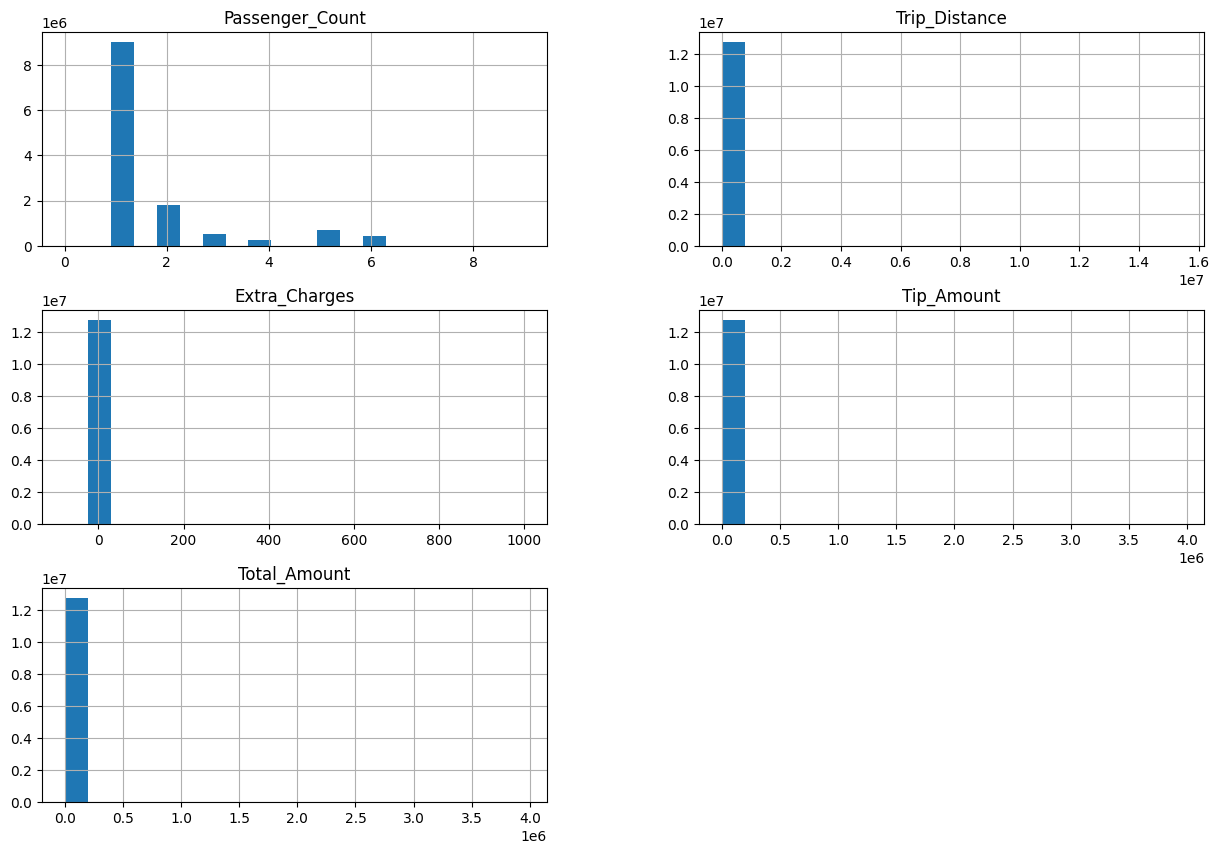

In [ ]:
numerical_features = ['Passenger_Count', 'Trip_Distance', 'Extra_Charges', 'Tip_Amount', 'Total_Amount']
df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.show()

second: Geospatial Analysis

In [ ]:
import folium
pickup_map = folium.Map(location=[df['Pickup_Latitude'].mean(), df['Pickup_Longitude'].mean()], zoom_start=12)
for index, row in df.sample(1000).iterrows():  # Sample 1000 data points for better visualization
    folium.CircleMarker(location=[row['Pickup_Latitude'], row['Pickup_Longitude']], radius=3, color='blue').add_to(pickup_map)
pickup_map

third: Correlation Analysis

<ipython-input-4-d3bed97ef942>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


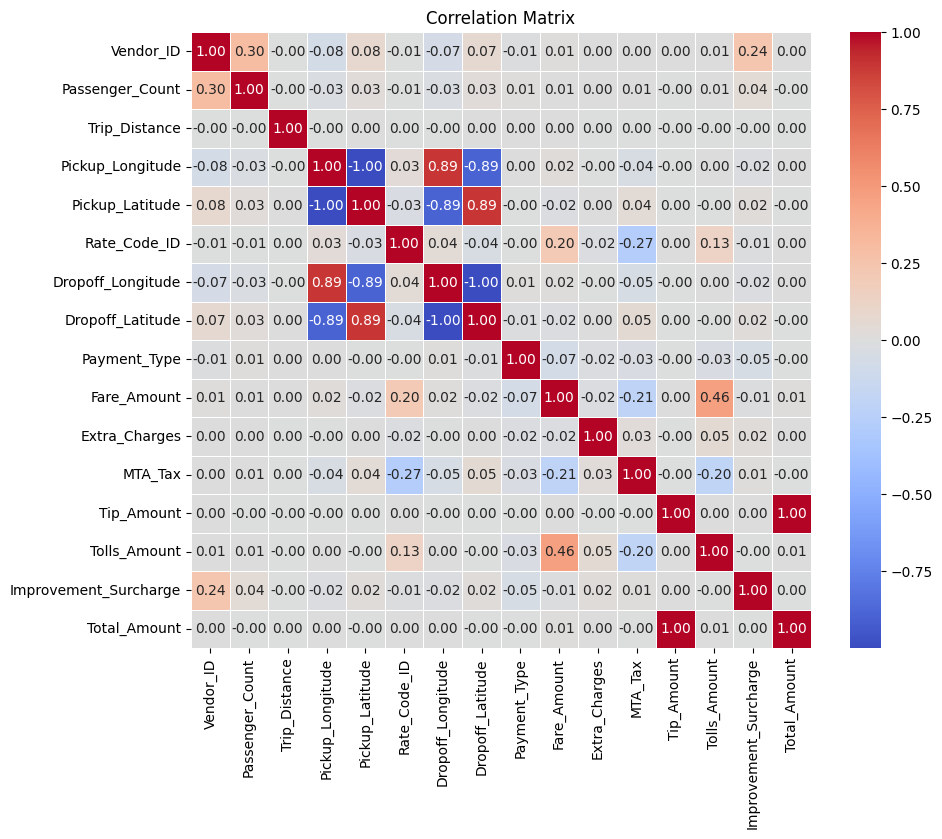

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

forthly: Scatter Plot of Trip Distance vs. Pickup Longitude

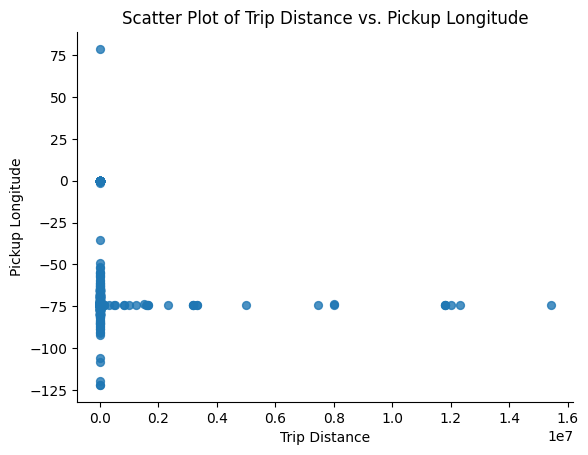

In [ ]:
plt.scatter(x=df['Trip_Distance'], y=df['Pickup_Longitude'], s=32, alpha=0.8)
plt.title('Scatter Plot of Trip Distance vs. Pickup Longitude')
plt.xlabel('Trip Distance')
plt.ylabel('Pickup Longitude')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

Lastly: Line Plot of Pickup Longitude

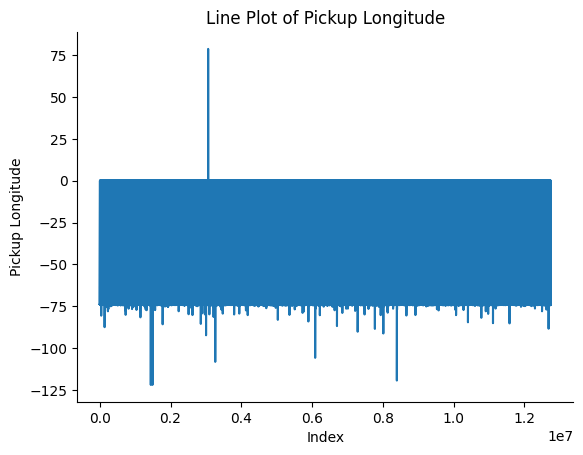

In [ ]:
plt.plot(df['Pickup_Longitude'])
plt.title('Line Plot of Pickup Longitude')
plt.xlabel('Index')
plt.ylabel('Pickup Longitude')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

# Feature Engineering

In this project, we will focuse on 4 main feature engineer technique:


1.   Feature Preprocessing
2.   Feature Creation
3.   Feature Transformation
4.   Feature Selection


## 1 Feature Preprocessing

Let's convert the 'Pickup_Datetime' and 'Dropoff_Datetime' columns to datetime format using the pd.to_datetime function.

In [ ]:
# Convert datetime features
df['Pickup_Datetime'] = pd.to_datetime(df['Pickup_Datetime'])
df['Dropoff_Datetime'] = pd.to_datetime(df['Dropoff_Datetime'])

Now we add simple Feature engineering by calcultaing the duration and average_speed

In [ ]:
# Feature engineering
df['Duration'] = (df['Dropoff_Datetime'] - df['Pickup_Datetime']).dt.total_seconds()
df['Average_Speed'] = df['Trip_Distance'] / (df['Duration'] / 3600)


Now we create a target for future model usage

In [ ]:
target = df['Total_Amount']


Since we are not using a model for this project, droping Total_Amount is not needed for now.

In [ ]:
#df = df.drop('Total_Amount', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12748614 entries, 0 to 12748613
Data columns (total 21 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Vendor_ID               int64         
 1   Pickup_Datetime         datetime64[ns]
 2   Dropoff_Datetime        datetime64[ns]
 3   Passenger_Count         int64         
 4   Trip_Distance           float64       
 5   Pickup_Longitude        float64       
 6   Pickup_Latitude         float64       
 7   Rate_Code_ID            int64         
 8   Store_and_Forward_Flag  object        
 9   Dropoff_Longitude       float64       
 10  Dropoff_Latitude        float64       
 11  Payment_Type            int64         
 12  Fare_Amount             float64       
 13  Extra_Charges           float64       
 14  MTA_Tax                 float64       
 15  Tip_Amount              float64       
 16  Tolls_Amount            float64       
 17  Improvement_Surcharge   float64       
 18  

##2 Feature Creation and Transformation

First we focuse on time

This code focuses on extracting temporal components from the 'Pickup_Datetime' feature.

In [ ]:
df['pickup_hour'] = df['Pickup_Datetime'].dt.hour
df['pickup_day'] = df['Pickup_Datetime'].dt.day
df['pickup_month'] = df['Pickup_Datetime'].dt.month
df['pickup_day_of_week'] = df['Pickup_Datetime'].dt.dayofweek

the same process for Dropoff_Datetime

In [ ]:
df['dropoff_hour'] = df['Dropoff_Datetime'].dt.hour
df['dropoff_day'] = df['Dropoff_Datetime'].dt.day
df['dropoff_month'] = df['Dropoff_Datetime'].dt.month
df['dropoff_day_of_week'] = df['Dropoff_Datetime'].dt.dayofweek

Now we add a new feature trip_duration_minutes and then removing Pickup_Datetime, Dropoff_Datetime since they are no longer needed

In [ ]:
df['trip_duration_minutes'] = (df['Dropoff_Datetime'] - df['Pickup_Datetime']).dt.total_seconds() / 60
# Drop the Pickup_Datetime and Dropoff_Datetime columns
df.drop(['Pickup_Datetime', 'Dropoff_Datetime'], axis=1, inplace=True)

Now we display the new feature pickup_hour

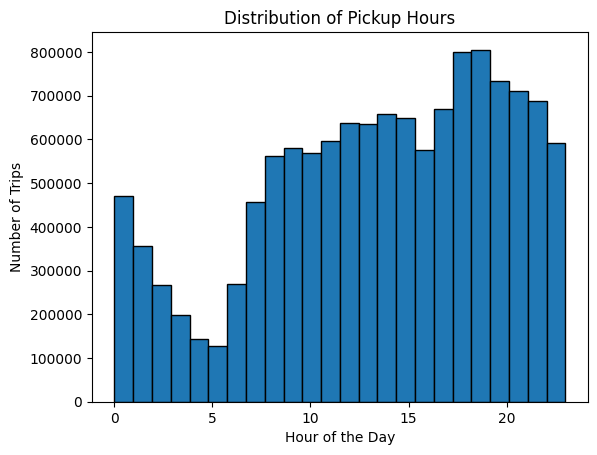

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['pickup_hour'], bins=24, edgecolor='black')
plt.title('Distribution of Pickup Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

Second we focuse on the Tips

Creating a new feature Tip_Percent, but adding a condition where Total_Amount does not equal zero to ensure that no none value are added to the datafram

In [ ]:
df["Tip_Percent"] = np.where(df["Total_Amount"] != 0, df["Tip_Amount"] / df["Total_Amount"] * 100, 0)


This code block introduces spatial features and indicates whether the taxi trip is moving predominantly from north to south or south to north ('Trip_Direction_NS') and from east to west or west to east ('Trip_Direction_EW').

In [ ]:
# value of this variable will be 2 if ride is moving from north to south, 1 if moving from south to north and 0 otherewise
df["Trip_Direction_NS"] = (df.Pickup_Latitude > df.Dropoff_Latitude)*1+1
indices = df[(df.Pickup_Latitude == df.Dropoff_Latitude) & (df.Pickup_Latitude!=0)].index
df.loc[indices,'Trip_Direction_NS'] = 0

# value of this variable will be 2 if ride is moving from east to west, 1 if moving from west to east and 0 otherewise
df['Trip_Direction_EW'] = (df.Pickup_Longitude > df.Dropoff_Longitude)*1+1
indices = df[(df.Pickup_Longitude == df.Dropoff_Longitude) & (df.Pickup_Longitude!=0)].index
df.loc[indices,'Trip_Direction_EW'] = 0


#tip given variable
df["Tip_Given"] = (df.Tip_Percent > 0) * 1

displaying the comparesion between non-tip and tip

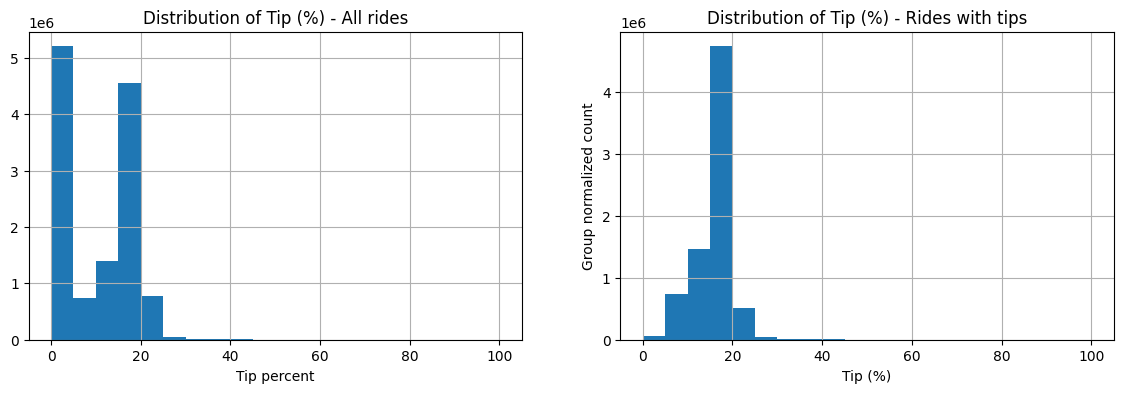

In [ ]:
#compare tip vs non-tip data distribution
tip = df[df.Tip_Percent > 0]
no_tip = df[df.Tip_Percent == 0]

fig,axis = plt.subplots(1,2,figsize=(14,4))
df.Tip_Percent.hist(bins = 20,ax=axis[0])
axis[0].set_xlabel('Tip percent')
axis[0].set_title('Distribution of Tip (%) - All rides')

tip.Tip_Percent.hist(bins = 20,ax=axis[1])
axis[1].set_xlabel('Tip (%)')
axis[1].set_title('Distribution of Tip (%) - Rides with tips')
axis[1].set_ylabel('Group normalized count')
plt.show()

General Creation

new feature for the total amount per mile

In [ ]:
#Total amount per mile:
df['Cost_Per_Mile'] = df['Total_Amount'] / df['Trip_Distance']

Data binning, also called data discrete binning or data bucketing, is a data pre-processing technique used to reduce the effects of minor observation errors. this code combain creation of new feature and doing some pre-processing technique.

In [ ]:
#Binning:
bins = [0, 2, 5, 10, float('inf')]
labels = ['short', 'medium', 'long', 'very_long']
df['Distance_Category'] = pd.cut(df['Trip_Distance'], bins=bins, labels=labels)


This code introduces a binary feature, 'Pickup_Dropoff_Same'

In [ ]:
#Coordinate Features:
df['Pickup_Dropoff_Same'] = (df['Pickup_Latitude'] == df['Dropoff_Latitude']) & (df['Pickup_Longitude'] == df['Dropoff_Longitude'])


This code block employs one-hot encoding on specific categorical features. The categorical features being encoded are 'Vendor_ID,' 'Rate_Code_ID,' 'Store_and_Forward_Flag,' and 'Payment_Type.'

In [ ]:
#Categorical features:
df_c = pd.get_dummies(df, columns=['Vendor_ID', 'Rate_Code_ID', 'Store_and_Forward_Flag', 'Payment_Type'], drop_first=True)


In [ ]:
df_c.head(5)

,Pickup_Datetime,Dropoff_Datetime,Passenger_Count,Trip_Distance,Pickup_Longitude,Pickup_Latitude,Dropoff_Longitude,Dropoff_Latitude,Fare_Amount,Extra_Charges,...,Rate_Code_ID_3,Rate_Code_ID_4,Rate_Code_ID_5,Rate_Code_ID_6,Rate_Code_ID_99,Store_and_Forward_Flag_Y,Payment_Type_2,Payment_Type_3,Payment_Type_4,Payment_Type_5
0,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,-73.974785,40.750618,12.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,-73.994415,40.759109,14.5,0.5,...,False,False,False,False,False,False,False,False,False,False
2,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,-73.951820,40.824413,9.5,0.5,...,False,False,False,False,False,False,True,False,False,False
3,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,-74.004326,40.719986,3.5,0.5,...,False,False,False,False,False,False,True,False,False,False
4,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,-74.004181,40.742653,15.0,0.5,...,False,False,False,False,False,False,True,False,False,False


##  3 Feature Selection (based on correlation)
### Correlation Analysis

This code focuses on numerical correlation analysis. It begins by selecting only the numerical features from the DataFrame using the select_dtypes function

In [ ]:
# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Print or visualize the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                       Vendor_ID  Passenger_Count  Trip_Distance  \
Vendor_ID               1.000000         0.299092  -1.127157e-03   
Passenger_Count         0.299092         1.000000  -3.853915e-04   
Trip_Distance          -0.001127        -0.000385   1.000000e+00   
Pickup_Longitude       -0.076354        -0.028020  -1.538044e-04   
Pickup_Latitude         0.076397         0.027997   1.552573e-04   
Rate_Code_ID           -0.005357        -0.006361   4.927795e-05   
Dropoff_Longitude      -0.070074        -0.026309  -1.521377e-04   
Dropoff_Latitude        0.070118         0.026296   1.513657e-04   
Payment_Type           -0.014206         0.012632   1.084202e-03   
Fare_Amount             0.010248         0.007480   4.421803e-04   
Extra_Charges           0.003967         0.003032   5.343040e-05   
MTA_Tax                 0.003828         0.005991   3.430674e-05   
Tip_Amount              0.000263        -0.000162  -7.988141e-07   
Tolls_Amount            0.00

This code addresses the identification of highly correlated features within the dataset. We will calculates the number of highly correlated features using the correlation matrix obtained in the previous step.

In [ ]:
# Identify highly correlated features
threshold = 0.8
highly_correlated = (correlation_matrix.abs() > threshold).sum()

# Print highly correlated features
print("\nHighly Correlated Features:")
print(highly_correlated)




Highly Correlated Features:
Vendor_ID                1
Passenger_Count          1
Trip_Distance            1
Pickup_Longitude         4
Pickup_Latitude          4
Rate_Code_ID             1
Dropoff_Longitude        4
Dropoff_Latitude         4
Payment_Type             2
Fare_Amount              1
Extra_Charges            1
MTA_Tax                  1
Tip_Amount               3
Tolls_Amount             1
Improvement_Surcharge    1
Total_Amount             3
Duration                 1
Average_Speed            1
Tip_Percent              2
Cost_Per_Mile            3
dtype: int64


Lastly in this steps, we will addresse the mitigation of multicollinearity by removing highly correlated features from the dataset.

In [ ]:
# Remove highly correlated features
# You may choose to drop one of the highly correlated features to avoid redundancy.
# For example, you can drop the second feature in the pair.
to_drop = [column for column in correlation_matrix.columns if any(correlation_matrix[column].abs() > threshold)]
data_no_high_corr = df.drop(columns=to_drop)

# Print or visualize the dataset without highly correlated features
print("\nDataset without Highly Correlated Features:")
print(data_no_high_corr)


Dataset without Highly Correlated Features:
             Pickup_Datetime    Dropoff_Datetime Store_and_Forward_Flag  \
0        2015-01-15 19:05:39 2015-01-15 19:23:42                      N   
1        2015-01-10 20:33:38 2015-01-10 20:53:28                      N   
2        2015-01-10 20:33:38 2015-01-10 20:43:41                      N   
3        2015-01-10 20:33:39 2015-01-10 20:35:31                      N   
4        2015-01-10 20:33:39 2015-01-10 20:52:58                      N   
...                      ...                 ...                    ...   
12748609 2015-01-10 19:01:44 2015-01-10 19:05:40                      N   
12748610 2015-01-10 19:01:44 2015-01-10 19:07:26                      N   
12748611 2015-01-10 19:01:44 2015-01-10 19:15:01                      N   
12748612 2015-01-10 19:01:44 2015-01-10 19:17:03                      N   
12748613 2015-01-10 19:01:45 2015-01-10 19:07:33                      N   

          pickup_hour  pickup_day  pickup_month  picku

In this section, the reasons to why we want to remove highly correlated features is:


1.   Redundancy and Multicollinearity:


*   Highly correlated features may carry similar information, which may lead icreas computational complexity and it might not provaide any additional values.
*   Multicollinearity occurs when two or more independent variables are highly correlated. This can make it challenging to interpret the individual contributions of each variable.


2.   Improved Model Performance: highly correlated features can negatively impact the performance of some machine learning models.

3.   Interpretability: having a simpler and more interpretable model is desirable in some cases.



### Correlation Matrix


Now we will select a subset of numeric features from the DataFrame, then calculates the correlation matrix for these numeric features, providing insights into the relationships between various quantitative aspects of the dataset.

In [ ]:
numeric_features = df[['Passenger_Count', 'Trip_Distance', 'Pickup_Longitude', 'Pickup_Latitude',
                       'Dropoff_Longitude', 'Dropoff_Latitude', 'Fare_Amount',
                       'MTA_Tax', 'Tip_Amount', 'Tolls_Amount',
                       'Total_Amount', 'pickup_hour',
                       'dropoff_hour', 'Tip_Percent',
                       'Trip_Direction_NS', 'Trip_Direction_EW', 'Tip_Given',
                       'Cost_Per_Mile', 'pickup_cluster']]

# Calculate correlation matrix
correlation_matrix = numeric_features.corr()

Plotting the correlation matrix using seaborn

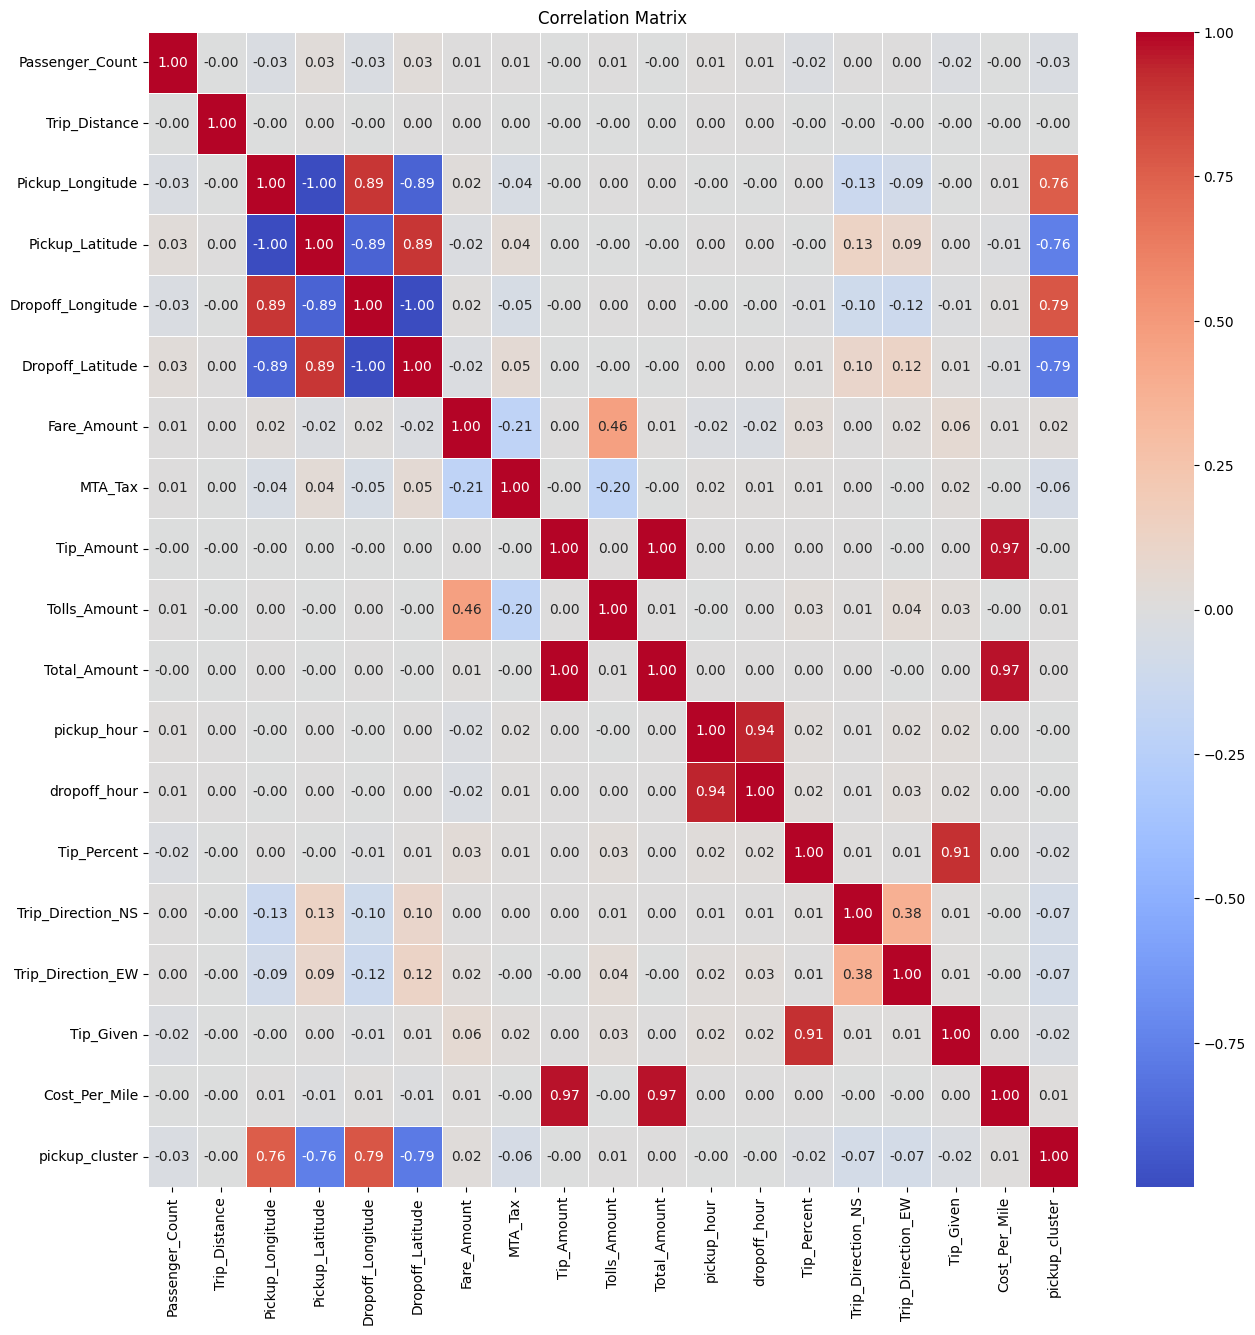

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## 4 Spatial Features (combaining feature transformation and feature creation):


here we will employs the K-Means clustering algorithm from scikit-learn to cluster the pickup and dropoff locations based on latitude and longitude coordinates. The algorithm forms five clusters, and the resulting cluster labels are assigned to the 'pickup_cluster', providing a categorical representation of spatial patterns in taxi trip data.

In [ ]:
from sklearn.cluster import KMeans
coordinates = df[['Pickup_Latitude', 'Pickup_Longitude', 'Dropoff_Latitude', 'Dropoff_Longitude']]
kmeans = KMeans(n_clusters=5, random_state=42).fit(coordinates)
df['pickup_cluster'] = kmeans.predict(df[['Pickup_Latitude', 'Pickup_Longitude', 'Dropoff_Latitude', 'Dropoff_Longitude']])


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


to check if the clustering accured by employing the unique()

In [ ]:
unique_values = df['pickup_cluster'].unique()

# Print the unique values
print("Unique values in the column:")
print(unique_values)

Unique values in the column:
[0 1 2 3 4]


Visualization of the clusterings

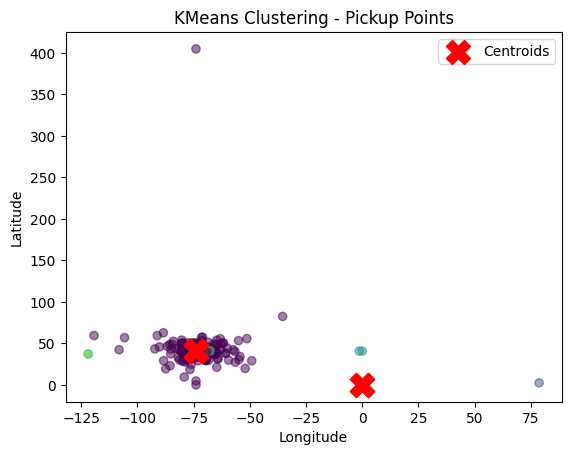

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Pickup_Longitude'], df['Pickup_Latitude'], c=df['pickup_cluster'], cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=300, c='red', marker='X', label='Centroids')
plt.title('KMeans Clustering - Pickup Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


PinPoint the clusters in a map using folium

In [ ]:
import folium

map_clusters = folium.Map(
    location=[df['Pickup_Latitude'].mean(), df['Pickup_Longitude'].mean()],
    zoom_start=12,
    width='75%',
    height='75%'
)

for idx, center in enumerate(kmeans.cluster_centers_):
    folium.Marker(location=[center[0], center[1]], popup=f'Cluster {idx}', icon=folium.Icon(color='red')).add_to(map_clusters)

map_clusters


## 5 One-hot encoding

For one-hot encoding, we will construct a new DataFrame, 'df_hot,' containing sample data for four categorical features.

In [ ]:
df_hot = pd.DataFrame({
    'Vendor_ID': [2, 1, 1, 1, 1],
    'Rate_Code_ID': [1, 1, 1, 1, 1],
    'Store_and_Forward_Flag': ['N', 'N', 'N', 'N', 'N'],
    'Payment_Type': [1, 1, 2, 2, 2]
})

now let create binary columns for each category within the specified categorical features

In [ ]:
# Apply one-hot encoding
df_encoded = pd.get_dummies(df_hot, columns=['Vendor_ID', 'Rate_Code_ID', 'Store_and_Forward_Flag', 'Payment_Type'])
payment_type_distribution = df_encoded['Payment_Type_1'].value_counts()


we can now visualize the results of one-hot encoding

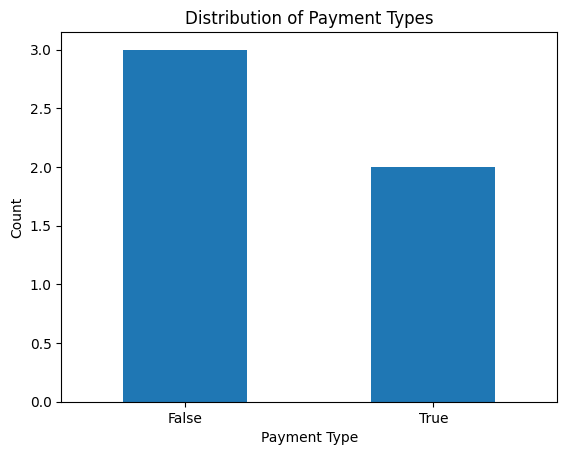

In [ ]:
payment_type_distribution.plot(kind='bar', rot=0)
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()

here we will apply one-hot encoding to the 'Distance_Category' feature in the DataFrame. The resulting one-hot encoded features are prefixed with 'Distance_Category,' and the original column is dropped to avoid multicollinearity.

In [ ]:
# Perform one-hot encoding for 'Distance_Category'
distance_category_encoded = pd.get_dummies(df['Distance_Category'], prefix='Distance_Category', drop_first=True)

# Concatenate the one-hot encoded features to the original dataframe
df = pd.concat([df, distance_category_encoded], axis=1)

# Drop the original 'Distance_Category' column
df.drop(['Distance_Category'], axis=1, inplace=True)

displaying the new encoded features

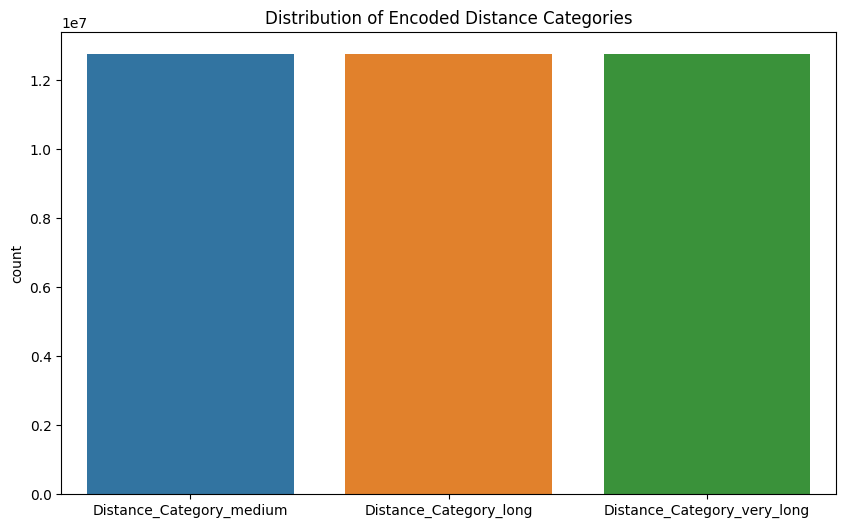

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=distance_category_encoded)
plt.title('Distribution of Encoded Distance Categories')
plt.show()

# Conclusion

In conclusion, this data science project focused on comprehensive feature engineering and exploratory data analysis (EDA) of the New York City Yellow Taxi Trip Data from January 2015. Through extensive preprocessing, temporal feature extraction, spatial clustering, and categorical encoding, the dataset was enriched with meaningful information.

## Refrences

> 8 Feature Engineering Techniques for Machine Learning. (n.d.). ProjectPro. https://www.projectpro.io/article/8-feature-engineering-techniques-for-machine-learning/423

> Deaconu, G. (2022, March 23). 5 ways to deal with large datasets in Python. Medium. https://towardsdatascience.com/5-ways-to-deal-with-large-datasets-in-python-9a80786c4182

> NYC Yellow Taxi Trip Data. (n.d.). Www.kaggle.com. https://www.kaggle.com/datasets/elemento/nyc-yellow-taxi-trip-data

> Pandey, P. (2021, April 18). Loading large datasets in Pandas. Medium. https://towardsdatascience.com/loading-large-datasets-in-pandas-11bdddd36f7b



